#  第3章 k近邻法

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter
%matplotlib inline

## 手写KNN

K近邻模型主要是由距离度量、k值的选择和分类决策规则决定。

#### 距离度量（欧式距离）

![](knn.png)

**distance**:  
$ L_{p}\left(x_{i}, x_{j}\right)=\left(\sum_{l=1}^{n}\left|x_{i}^{(l)}-x_{j}^{(l)}\right|^{p}\right)^{\frac{1}{p}}$

In [2]:
def distance(x, y, p=2): #定义距离（其中，p=1是曼哈顿距离，p=2是欧氏距离，p为正无穷时，它是各个坐标距离的最大值）
    """计算两点之间的距离P.
    input:
        x: N*M 矩阵.
        y: 1*M 矩阵.
        p: 距离类型
        
    output:
        N*1 x与y之间的距离的矩阵形式.
    """
    try:
        dis = np.power(np.sum(np.power(np.abs((x - y)), p), 1), 1/p)
    except:
        dis = np.power(np.sum(np.power(np.abs((x - y)), p)), 1/p)
    
    return dis

注意：由不同距离度量所确定的最近近邻点是不同的！

In [3]:
# 这里使用经典的鸢尾花数据
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [4]:
df.head(100)

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [5]:
df.describe()

,sepal length,sepal width,petal length,petal width,label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


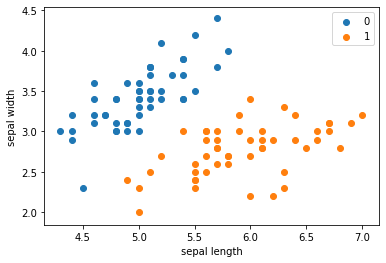

In [6]:
# 作图

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [23]:
# X, y
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
class KNN:
    """
    KNN这个算法玩的就是暴力.
    """
    def __init__(self, X_train, y_train, n_neighbors=1, p=2):
        """
        n_neighbors: k
                  p: type of distance
        """
        self.k = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
        diss = distance(self.X_train, X, self.p)
        diss_idx = np.argsort(diss) # return sorted index
        top_k_idx = diss_idx[:self.k]
        top_k_diss = diss[top_k_idx]
        top_k_points = self.X_train[top_k_idx]
        top_k_diss = diss[top_k_idx]
        top_k_y = self.y_train[top_k_idx]
        counter = Counter(top_k_y)
        label = counter.most_common()[0][0]
        return label, top_k_points, top_k_diss
    
    def score(self, X_test, y_test):
        right_count = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)[0]
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [9]:
clf = KNN(X_train, y_train) #train

In [10]:
clf.score(X_test, y_test) # 在测试集上验证效果

1.0

In [11]:
# 对单一一个点test 

test_point = [6, 2.7]
clf.predict(test_point)

(1.0, array([[6. , 2.7]]), array([0.]))

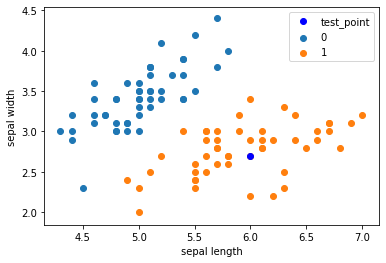

In [12]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

分类效果还行

## scikitlearn 的KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
clf_sk.score(X_test, y_test)

1.0

In [22]:
clf_sk.fit(X_train,y_train)

KNeighborsClassifier()

## kd树

### 构建kd树

In [ ]:
# 算法 平衡kd树

class KdTree:
    """
    build kdtree recursively along axis, split on median point.
    k:      k dimensions
    method: alternate/variance, 坐标轴轮替或最大方差轴
    """
    
    def __init__(self, k=2, method='alternate'):
        self.k = k
        self.method = method
        
    def build(self, points, depth=0):
        n = len(points)
        if n <= 0:
            return None
        
        if self.method == 'alternate':
            axis = depth % self.k
        elif self.method == 'variance':
            axis = np.argmax(np.var(points, axis=0), axis=0)
        
        sorted_points = sorted(points, key=lambda point: point[axis])
        
        return {
            'point': sorted_points[n // 2],
            'left': self.build(sorted_points[:n//2], depth+1),
            'right': self.build(sorted_points[n//2+1:], depth+1)
        }

#### 例3.2

In [ ]:
data = np.array([[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]])

kd1 = KdTree(k=2, method='alternate')
tree1 = kd1.build(data)

kd2 = KdTree(k=2, method='variance')
tree2 = kd2.build(data)

In [ ]:
# friendly print

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(tree1) # equal to figure. 3.4 《统计学习方法》

In [ ]:
pp.pprint(tree2) # 在该数据集上两种方法结果一样

### 查找kd树

In [ ]:
class SearchKdTree:
    """
    查找最近点
    """
    def __init__(self, k=2):
        self.k = k
        
    def __closer_distance(self, pivot, p1, p2):
        if p1 is None:
            return p2
        if p2 is None:
            return p1
        
        d1 = distance(pivot, p1)
        d2 = distance(pivot, p2)

        if d1 < d2:
            return p1
        else:
            return p2
    
    def fit(self, root, point, depth=0):
        if root is None:
            return None
        
        axis = depth % self.k
        
        next_branch = None
        opposite_branch = None
        
        if point[axis] < root['point'][axis]:
            next_branch = root['left']
            opposite_branch = root['right']
        else:
            next_branch = root['right']
            opposite_branch = root['left']
            
        best = self.__closer_distance(point,
                                     self.fit(next_branch,
                                             point,
                                             depth+1),
                                     root['point'])
        
        if distance(point, best) > abs(point[axis] - root['point'][axis]):
            best = self.__closer_distance(point,
                                     self.fit(opposite_branch,
                                             point,
                                             depth+1),
                                     best)
            
        return best

In [ ]:
# test
point = [3.,4.5]

search = SearchKdTree()
best = search.fit(tree1, point, depth=0)
print(best)

In [ ]:
# force computing
def force(points, point):
    dis = np.power(np.sum(np.power(np.abs((points - point)), 2), 1), 1/2)
    idx = np.argmin(dis, axis=0)
    return points[idx]
print(force(data, point))

##### 看上去，相比于在大量的数据点中寻找与目标最近的点，kd树不需要一个个查找,O(n)的复杂的，效率提高了。

# 比较下 force和KD树之间运算所需的时间

In [ ]:
from time import time

In [ ]:
# 创建个数据集
N = 500000
K = 5
points = np.random.randint(15, size=(N, K))
points.shape

In [ ]:
# generate一个kd数
kd_tree = KdTree(k=K, method='alternate')
tree = kd_tree.build(points)

In [ ]:
# generate测试点
test_point = np.random.randint(10, size=(K))

In [ ]:
t_point = [8.,5.,1.,2.,2.]

In [ ]:
# KD树找点

start = time()
seah = SearchKdTree()
best = seah.fit(tree, t_point, depth=0)
end = time()
dist = distance(t_point, best)
print('best point:{}, distance:{}, time cost:{}'.format(best, dist, end - start))

In [ ]:
# force时间

start = time()
best = force(points, t_point)
end = time()
dist = distance(t_point, best)
print('best point:{}, distance:{}, time cost:{}'.format(best, dist, end - start))

看上去，相比于在大量的数据点中寻找与目标最近的点，kd树不需要一个个查找,O(n)的复杂的，看上去确实效率提高了。但是！对于numpy来说，numpy的矩阵运算是常量时间复杂度O(1)，效率极高。在内存许可的情况下，可以快速查找出符合要求的点, 速度比kd树还快, 从上面的时间消耗可以看出。